In [2]:
import sunpy

In [3]:
sunpy.system_info()

SunPy Installation Information

#######
General
#######
Time : Tuesday, 04. June 2019 02:02AM UT
System : Darwin
Processor : i386
Arch : 64bit
SunPy : 1.0.0
OS: Mac OS X 10.13.6 (i386)


##################
Required Libraries
##################
Python: 3.6.8
NumPy: 1.15.4
SciPy: 1.1.0
matplotlib: 3.0.3
Astropy: 3.1.2
Pandas: 0.23.4
parfive: 0.2.1


#####################
Recommended Libraries
#####################
beautifulsoup: 4.6.3
PyQt4: 4.11.4
PyQt5: NOT INSTALLED
Zeep: 3.3.1
Sqlalchemy: 1.2.12
drms: 0.5.5


In [62]:
import numpy as np
import sunpy.map
from sunpy.coordinates import frames
from sunpy.net import Fido, attrs as a
from astropy import units as u
from astropy.coordinates import SkyCoord
from sunpy import timeseries as ts
from sunpy.coordinates import get_body_heliographic_stonyhurst
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)

# Aquiring Data and SunPy Data Classes

## Fido Unified Downloader

Fido (Federated Internet Data Obtainer) is a unified interface for the search and retrival of solar physics data regardless of the underlying client or webservice through which the data is obtained, e.g. VSO, JSOC, etc. 

In SunPy 1.0 Fido now makes use of an asynchronous download stream through the module `parfive`

## Lets look at how we can search and download some solar physics data

In [2]:
#lets search for some SDO/AIA data over some time
results = Fido.search(a.Time('2014/05/15 08:00', '2014/05/15 08:10'), a.Instrument('AIA'))

In [3]:
results

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2014-05-15 08:00:01,2014-05-15 08:00:02,SDO,AIA,FULLDISK,94.0 .. 94.0
2014-05-15 08:00:02,2014-05-15 08:00:03,SDO,AIA,FULLDISK,335.0 .. 335.0
2014-05-15 08:00:06,2014-05-15 08:00:07,SDO,AIA,FULLDISK,193.0 .. 193.0
2014-05-15 08:00:07,2014-05-15 08:00:08,SDO,AIA,FULLDISK,304.0 .. 304.0
2014-05-15 08:00:07,2014-05-15 08:00:08,SDO,AIA,FULLDISK,4500.0 .. 4500.0
2014-05-15 08:00:08,2014-05-15 08:00:09,SDO,AIA,FULLDISK,131.0 .. 131.0
2014-05-15 08:00:11,2014-05-15 08:00:12,SDO,AIA,FULLDISK,171.0 .. 171.0
2014-05-15 08:00:11,2014-05-15 08:00:12,SDO,AIA,FULLDISK,211.0 .. 211.0


In [4]:
results.file_num

400

Queries to Fido can be make more specific by using other attributes. Lets narrow the search to only look at one wavelength, with a cadence of 1 minute. This makes use of Astropy units 

In [5]:
results = Fido.search(a.Time('2014/05/15 08:00', '2014/05/15 08:10'), a.Instrument('AIA'), 
                      a.Wavelength(171*u.angstrom), a.vso.Sample(1*u.minute))

In [6]:
results

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2014-05-15 08:08:11,2014-05-15 08:08:12,SDO,AIA,FULLDISK,171.0 .. 171.0
2014-05-15 08:05:11,2014-05-15 08:05:12,SDO,AIA,FULLDISK,171.0 .. 171.0
2014-05-15 08:02:11,2014-05-15 08:02:12,SDO,AIA,FULLDISK,171.0 .. 171.0
2014-05-15 08:03:11,2014-05-15 08:03:12,SDO,AIA,FULLDISK,171.0 .. 171.0
2014-05-15 08:07:11,2014-05-15 08:07:12,SDO,AIA,FULLDISK,171.0 .. 171.0
2014-05-15 08:04:11,2014-05-15 08:04:12,SDO,AIA,FULLDISK,171.0 .. 171.0
2014-05-15 08:06:11,2014-05-15 08:06:12,SDO,AIA,FULLDISK,171.0 .. 171.0
2014-05-15 08:09:11,2014-05-15 08:09:12,SDO,AIA,FULLDISK,171.0 .. 171.0


## The search results can then be downloaded via the fetch function

In [7]:
aia_files = Fido.fetch(results)

In [8]:
aia_files[0:10]

['/Users/laurahayes/sunpy/data/aia_lev1_171a_2014_05_15t08_00_11_34z_image_lev1.fits',
 '/Users/laurahayes/sunpy/data/aia_lev1_171a_2014_05_15t08_08_11_34z_image_lev1.fits',
 '/Users/laurahayes/sunpy/data/aia_lev1_171a_2014_05_15t08_04_11_34z_image_lev1.fits',
 '/Users/laurahayes/sunpy/data/aia_lev1_171a_2014_05_15t08_03_11_34z_image_lev1.fits',
 '/Users/laurahayes/sunpy/data/aia_lev1_171a_2014_05_15t08_01_11_34z_image_lev1.fits',
 '/Users/laurahayes/sunpy/data/aia_lev1_171a_2014_05_15t08_07_11_34z_image_lev1.fits',
 '/Users/laurahayes/sunpy/data/aia_lev1_171a_2014_05_15t08_05_11_34z_image_lev1.fits',
 '/Users/laurahayes/sunpy/data/aia_lev1_171a_2014_05_15t08_06_11_34z_image_lev1.fits',
 '/Users/laurahayes/sunpy/data/aia_lev1_171a_2014_05_15t08_02_11_34z_image_lev1.fits',
 '/Users/laurahayes/sunpy/data/aia_lev1_171a_2014_05_15t08_09_11_34z_image_lev1.fits']

## More detailed searchs with Fido
Fido searches can include searchs from multiple instruments, wavelengths, times etc. This is achieved through the | opertaior which acts as a logical OR operator.


In [9]:
results = Fido.search(a.Time('2014/05/15 08:00', '2014/05/15 08:10'), a.Instrument('AIA')|a.Instrument('SWAP'))
   

In [10]:
# the results can be indexed to access a subset of the search results
results[:,0]

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2014-05-15 08:00:01,2014-05-15 08:00:02,SDO,AIA,FULLDISK,94.0 .. 94.0
Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str6,str4,str7,float64
2014-05-15 08:03:06,2014-05-15 08:03:16,PROBA2,SWAP,FULLSUN,174.0 .. 174.0


In [11]:
files = Fido.fetch(results[:,0])

# 2. Handeling DataTypes (Map and Timeseries)

SunPy provides core data type classes that are designed to provide a consistent interface acress data types (lightcurves and images) as well as data sources from numerous instruments and observations. They handle all of the manipulation necessary to read data in from mission-specific files.  The two main datatypes in SunPy are the TimeSeries and Map classes.

## 2.1 TimeSeries
The structure of a TimeSeries consists of times and measurements and the underlying structure is that of a `pandas.DataFrame`. SunPy TimeSeries supports time-series data from a wide range of solar-focussed instruments.

Lets look at an example of using TimeSeries to deal with GOES/XRS observations

In [58]:
search_results = Fido.search(a.Time('2013-10-28 00:00','2013-10-28 12:00'),a.Instrument('XRS'))
goes_files = Fido.fetch(search_results[0])

In [66]:
goes_lc = ts.TimeSeries(goes_files)

/Users/laurahayes/anaconda3/lib/python3.7/functools.py:824: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)
/Users/laurahayes/anaconda3/lib/python3.7/functools.py:824: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


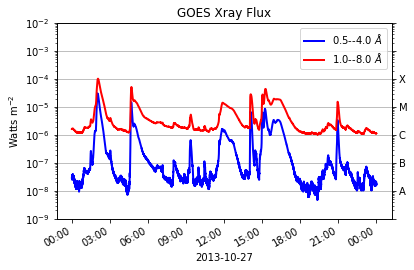

In [65]:
goes_lc.peek()

We can inspect the meta information in the TimeSeries object.

In [15]:
goes_lc.meta

|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2013-10-27 23:59:58.311999 | xrsa            | simple: True                                      |
|            to             | xrsb            | bitpix: 8                                         |
|2013-10-28 23:59:56.468999 |                 | naxis: 0                                          |
|                           |                 | extend: True                                      |
|                           |                 | date: 02/11/2013                                  |
|                           |                 | numext: 3                                         |
|                           |                 | telescop: GOES 15                                 |


And inspect the associated units

In [16]:
goes_lc.units

OrderedDict([('xrsa', Unit("W / m2")), ('xrsb', Unit("W / m2"))])

We can also inspect and manipulate the data

In [17]:
goes_lc.data[0:10]

,xrsa,xrsb
2013-10-27 23:59:58.311999798,2.946400e-08,0.000002
2013-10-28 00:00:00.358999968,2.723500e-08,0.000002
2013-10-28 00:00:02.408999920,2.946400e-08,0.000002
2013-10-28 00:00:04.454999924,2.946400e-08,0.000002
2013-10-28 00:00:06.501999855,2.946400e-08,0.000002
2013-10-28 00:00:08.551999807,3.057800e-08,0.000002
2013-10-28 00:00:10.598999977,2.946400e-08,0.000002
2013-10-28 00:00:12.648999929,2.946400e-08,0.000002
2013-10-28 00:00:14.694999933,3.057800e-08,0.000002
2013-10-28 00:00:16.741999865,2.834900e-08,0.000002


In [18]:
goes_lc.data['xrsb'][0:5] = 10

In [19]:
goes_lc.data['xrsb'][0:10]

2013-10-27 23:59:58.311999798    10.000000
2013-10-28 00:00:00.358999968    10.000000
2013-10-28 00:00:02.408999920    10.000000
2013-10-28 00:00:04.454999924    10.000000
2013-10-28 00:00:06.501999855    10.000000
2013-10-28 00:00:08.551999807     0.000002
2013-10-28 00:00:10.598999977     0.000002
2013-10-28 00:00:12.648999929     0.000002
2013-10-28 00:00:14.694999933     0.000002
2013-10-28 00:00:16.741999865     0.000002
Name: xrsb, dtype: float32

We can also truncate the data to specific times of interest

In [64]:
#new_goes_lc = goes_lc.truncate('2013-10-28 01:00', '2013-10-28 02:30')
#new_goes_lc.peek()

## 2.2 Map 
The SunPy Map class provides the data type structure to store 2-dimensional data associated with a coordinate system. This allows users to store and manipulate images of the Sun and the heliosphere. Like TimeSeries, Map explicitly supports observations from mulitple instruments, as well as 2D data with associated WCS coordinate information.

Lets look at an example of image analysis with Map

In [21]:
aia_map = sunpy.map.Map(aia_files[0])

/Users/laurahayes/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


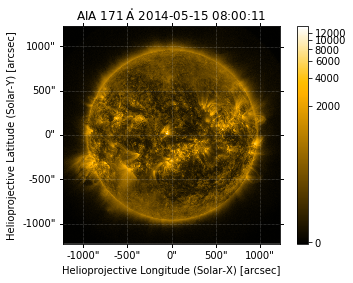

In [22]:
aia_map.peek()

We can inspect the map, the meta data etc

In [23]:
aia_map

SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 171.0 Angstrom
Wavelength:		 171.0 Angstrom
Observation Date:	 2014-05-15 08:00:11
Exposure Time:		 2.000172 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.599489 0.599489] arcsec / pix
Reference Pixel:	 [2052.050049 2049.070068] pix
Reference Coord:	 [0. 0.] arcsec
array([[-2, -2,  0, ..., -1, -1,  0],
       [-1,  0,  1, ...,  1,  0,  0],
       [-3,  0,  0, ...,  1, -2,  1],
       ...,
       [-1, -2,  1, ..., -1, -1,  0],
       [ 0,  1,  1, ..., -1, -1, -1],
       [-2,  0,  2, ..., -2,  1,  0]], dtype=int16)

One of the key features is the coordinate frame underlying Map through the defined WCS and utilizes the SunPy coordinate subpackage